# Fast Iterative Solvers - Project 2

Name: Sebastian Bennet Linden<br>
Matriculation Number: 409559

Imports

In [112]:
from msr_reader import msr_reader
import os
import numpy as np
import time
import matplotlib.pyplot as plt

# Part 1

Read Project 2 Matrix

In [101]:
# Paths
directory = os.getcwd()
# Read matrices
M1a = msr_reader(f"{directory}/project_1_matrices/cg_matrix_msr_1.txt")
M1b = msr_reader(f"{directory}/project_1_matrices/cg_matrix_msr_2.txt")
M2 = msr_reader(f"{directory}/project2_spd_matrix.txt")

Power Iterations Algorithm

In [137]:
def power_iterations(A, tol=1e-6, max_iter=1000):
    N = A.shape[0]
    q = np.ones(N) / np.sqrt(N)
    iterations = 0
    lambdas = []
    improvements = []
    times = []
    start_time = time.time()
    while True:
        iterations += 1
        z = A.dot(q)
        q = z / np.linalg.norm(z)
        l = q.conj().T.dot(A.dot(q))
        lambdas.append(l)
        if iterations > 1:
            improvement = abs(l - lambdas[-2])
            improvements.append(improvement)
            if improvement < tol:
                break
        end_time = time.time()
        times.append(end_time - start_time)
        if iterations >= max_iter:
            print("Maximum iterations reached without convergence.")
            break

    end_time = time.time()
    times.append(end_time - start_time)
    return l, iterations, improvements, times

Compute Convergence

In [138]:
lambda_max, iterations, improvements, times = power_iterations(M2, tol=1e-8)
print(len(improvements), " iterations until convergence")
print("Largest eigenvalue:", lambda_max)

115  iterations until convergence
Largest eigenvalue: 94759580.76483318


Plot Results (Improvements vs. Iterations)

<function matplotlib.pyplot.show(close=None, block=None)>

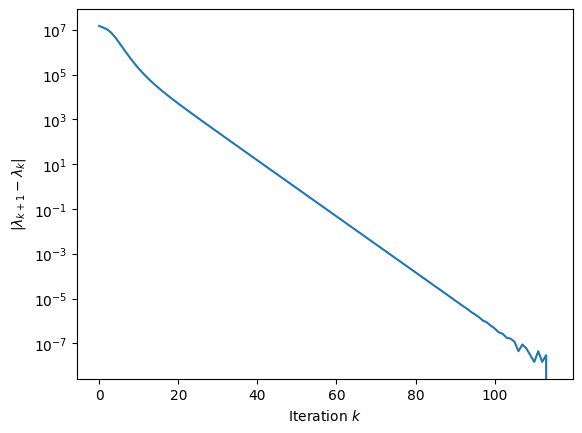

In [139]:
I = range(iterations-1)
plt.plot(I,improvements)
plt.yscale("log")
plt.xlabel(r"Iteration $k$")
plt.ylabel(r"$|\lambda_{k+1}-\lambda_k|$")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

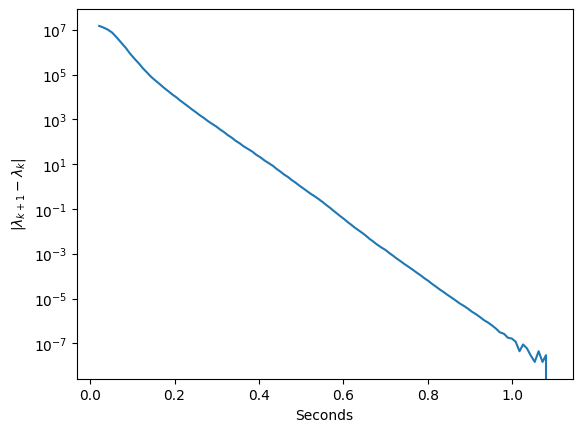

In [141]:
plt.plot(times[1:],improvements)
plt.yscale("log")
plt.xlabel(r"Seconds")
plt.ylabel(r"$|\lambda_{k+1}-\lambda_k|$")
plt.show

# Part 2

Lanczos Algorithm <br>
<br>
Keep in mind, that the output of the Lanczos algorithm is the array of diagonal entries (alphas) and the array of the off-diagonal entries (betas). These need to be assembled to a full tridiagonal matrix using the function "build_tridiag(alpha, beta)".

In [ ]:
def lanczos(A, v0, m):
    n = v0.shape[0]
    V = np.zeros((n, m))
    alpha = np.zeros(m)
    beta = np.zeros(m - 1)

    v_prev = np.zeros(n)
    v = v0 / np.linalg.norm(v0)

    for j in range(m):
        V[:, j] = v
        w = A @ v                       # Generate the next Krylov-vector
        if j > 0:
            w -= beta[j - 1] * v_prev   # Orthogonalization step (1)
        alpha[j] = np.dot(v, w)         # Estimate the j-th eigenvalue
        w -= alpha[j] * v               # Orthogonalization step (2)
        if j < m - 1:
            beta[j] = np.linalg.norm(w)
            if beta[j] < 1e-14:
                return alpha[:j + 1], beta[:j], V[:, :j + 1]
            v_prev = v
            v = w / beta[j]             # Normalize the vector for the next iteration
    return alpha, beta, V


Build Tridiagonal Matrix from diagonal and off-diagonal elements

In [107]:
def build_tridiag(alpha, beta):
    m = len(alpha)
    T = np.zeros((m, m))
    for i in range(m):
        T[i, i] = alpha[i]
        if i < m - 1:
            T[i, i+1] = beta[i]
            T[i+1, i] = beta[i]
    return T

Run Tests

In [121]:
# put code here

Convergence Plot

In [122]:
# put code here